<a href="https://colab.research.google.com/github/revaanwarr/pemograman-lanjutan/blob/main/Uji_asumsi_klasik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UJI ASUMSI KLASIK (Indeks Saham KOMPAS100)

**Reva Anwar 2C2230003** **Ariela Safmi 2C2230007**



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import jarque_bera

# Membaca dan Membersihkan Data

In [2]:
file_path = "/content/4 Lamp Peng-00073-BEI POP - KOMPAS100 - Apr 2025 Minor.xlsx"
df_raw = pd.read_excel(file_path, sheet_name="Lampiran 4")

In [3]:
df = df_raw.iloc[8:, [2, 3, 4, 5, 6, 7, 8]]
df.columns = ["Kode", "Free_Float", "Saham_Pra", "Saham_Pasca", "Keterangan1", "Bobot_Pra", "Bobot_Pasca"]

In [4]:
df = df[df["Kode"].notnull()].reset_index(drop=True)

In [5]:
numeric_cols = ["Free_Float", "Saham_Pra", "Saham_Pasca", "Bobot_Pra", "Bobot_Pasca"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [6]:
df = df.dropna(subset=numeric_cols)

# Regresi Linear

In [7]:
X = df["Free_Float"]
Y = df["Bobot_Pasca"]

In [8]:
X_const = sm.add_constant(X)

In [9]:
model = sm.OLS(Y, X_const).fit()
residuals = model.resid

# Uji Normalitas (Jarque-Bera)

---



In [10]:
jb_stat, jb_pval = jarque_bera(residuals)
print(f"Uji Normalitas (Jarque-Bera):\nStatistik = {jb_stat:.4f}, P-Value = {jb_pval:.4f}\n")

Uji Normalitas (Jarque-Bera):
Statistik = 456.1964, P-Value = 0.0000



**Plot Histogram Residual**

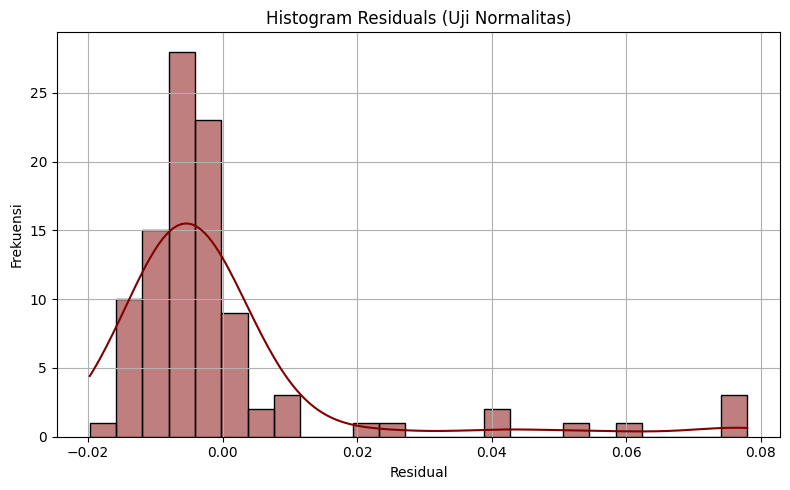

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=25, kde=True, color='maroon')
plt.title("Histogram Residuals (Uji Normalitas)")
plt.xlabel("Residual")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.tight_layout()
plt.show()

Hipotesis:

H₀: Residual berdistribusi normal

H₁: Residual tidak berdistribusi normal

Uji normalitas Jarque-Bera dilakukan untuk menguji apakah residual dari model mengikuti distribusi normal. Berdasarkan hasil uji yang ditampilkan, diperoleh nilai statistik sebesar 456.1964 dan nilai p-value sebesar 0.0000.

Dengan p-value sebesar 0.0000 (jauh di bawah tingkat signifikansi umum seperti 0.05), maka keputusan yang diambil adalah menolak H₀. Ini menunjukkan bahwa residual tidak berdistribusi normal.

Visualisasi histogram residual memperkuat hasil uji statistik. Histogram tampak condong ke kiri (left-skewed) dan tidak simetris, sehingga menunjukkan deviasi dari bentuk distribusi normal. Distribusi ini juga tampak memiliki kurtosis atau puncak yang tidak sesuai dengan distribusi normal.

Dengan demikian, model yang diuji menghasilkan residual yang tidak normal, yang dapat memengaruhi validitas asumsi klasik dalam regresi linear, terutama jika normalitas residual menjadi syarat penting untuk inferensi statistik.

# Uji Heteroskedastisitas (Glejser)

In [17]:
abs_resid = abs(residuals)
glejser_model = sm.OLS(abs_resid, X_const).fit()

In [18]:
print("Uji Heteroskedastisitas (Glejser):")
print(glejser_model.summary())

Uji Heteroskedastisitas (Glejser):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     11.06
Date:                Mon, 19 May 2025   Prob (F-statistic):            0.00124
Time:                        04:54:10   Log-Likelihood:                 282.76
No. Observations:                 100   AIC:                            -561.5
Df Residuals:                      98   BIC:                            -556.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.

**Visualisasi Glejser Test: Scatter plot |residual| vs X**

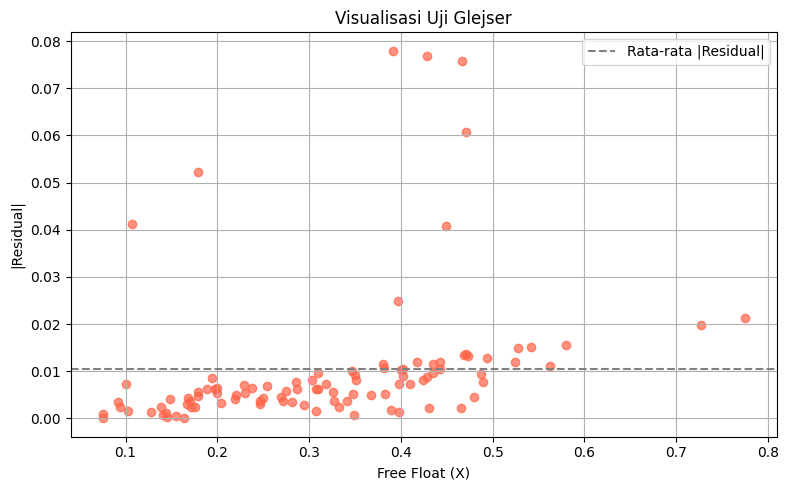

In [19]:
plt.figure(figsize=(8, 5))
plt.scatter(X, abs_resid, color='tomato', alpha=0.7)
plt.title("Visualisasi Uji Glejser")
plt.xlabel("Free Float (X)")
plt.ylabel("|Residual|")
plt.axhline(y=abs_resid.mean(), color='gray', linestyle='--', label='Rata-rata |Residual|')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Hipotesis nol dalam uji heteroskedastisitas adalah bahwa tidak ada heteroskedastisitas (varians residual konstan), sedangkan hipotesis alternatif menyatakan adanya heteroskedastisitas. Berdasarkan visualisasi data dan nilai p-value yang signifikan, hipotesis nol ditolak, yang menunjukkan adanya heteroskedastisitas pada model regresi ini. Adanya heteroskedastisitas mengindikasikan bahwa varians error tidak seragam, yang dapat mempengaruhi validitas estimasi koefisien regresi. Oleh karena itu, perlu dipertimbangkan transformasi variabel atau penggunaan metode regresi yang lebih tahan terhadap heteroskedastisitas, seperti regresi robust.

Pada tabel hasil regresi, terlihat bahwa nilai koefisien untuk Free_Float adalah 0.0338 dengan standar error sebesar 0.010. Statistik uji t dihitung dengan membagi koefisien dengan standar error, menghasilkan nilai t sebesar 3.326. Nilai p-value yang sangat kecil (0.001) menunjukkan bahwa koefisien Free_Float signifikan pada tingkat signifikansi 5%. Hal ini berarti Free_Float secara statistik berpengaruh terhadap variabel terikat.

Visualisasi data menunjukkan hasil uji heteroskedastisitas menggunakan metode Glejser. Pada grafik, nilai residual diplot terhadap variabel independen Free_Float, dengan garis horizontal mewakili rata-rata residual. Terdapat pola yang cenderung mengelompok di sekitar garis horizontal pada nilai Free_Float yang lebih rendah, namun seiring meningkatnya nilai Free_Float, sebaran residual semakin menyebar. Fenomena ini menunjukkan adanya indikasi heteroskedastisitas, di mana varians residual tidak konstan pada berbagai tingkat variabel independen. Hal ini dapat mengindikasikan bahwa model regresi tidak memenuhi asumsi homoskedastisitas.

# Uji Durbin-Watson


In [20]:
from statsmodels.stats.stattools import durbin_watson

In [21]:
dw_stat = durbin_watson(residuals)
print(f"Uji Durbin-Watson:\nStatistik DW = {dw_stat:.4f}")

Uji Durbin-Watson:
Statistik DW = 1.9055


In [22]:
if dw_stat < 1.5:
    print(">> Ada indikasi autokorelasi positif.")
elif dw_stat > 2.5:
    print(">> Ada indikasi autokorelasi negatif.")
else:
    print(">> Tidak ada indikasi autokorelasi.")

>> Tidak ada indikasi autokorelasi.


**Plot Residual terhadap Index Waktu**




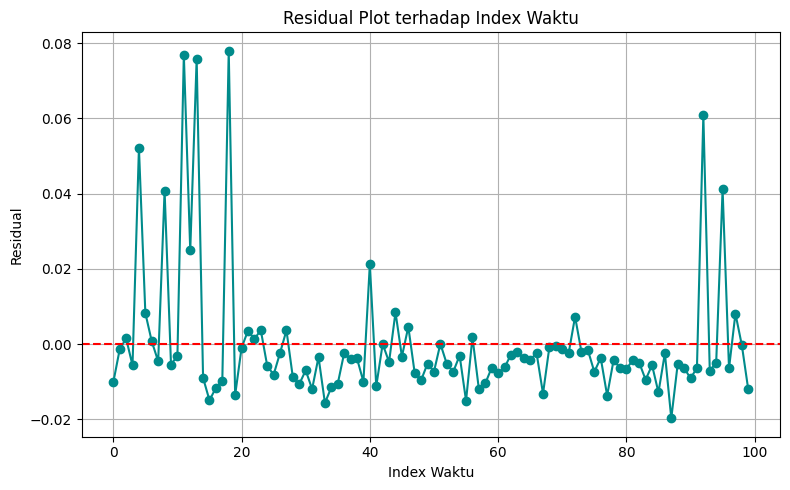

In [23]:
plt.figure(figsize=(8, 5))
plt.plot(residuals.values, linestyle='-', marker='o', color='darkcyan')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot terhadap Index Waktu")
plt.xlabel("Index Waktu")
plt.ylabel("Residual")
plt.grid(True)
plt.tight_layout()
plt.show()

Hipotesis yang digunakan dalam uji ini adalah tidak adanya autokorelasi pada residual sebagai hipotesis nol, dan adanya autokorelasi sebagai hipotesis alternatif. Berdasarkan hasil uji yang menunjukkan nilai Durbin-Watson sebesar 1.9055, hipotesis nol diterima, yang berarti tidak ada indikasi autokorelasi pada residual.

Visualisasi plot residual terhadap indeks waktu menunjukkan pola fluktuasi yang cukup signifikan pada awal pengamatan, dengan beberapa lonjakan yang cukup tinggi, kemudian stabil pada pertengahan pengamatan, dan kembali meningkat pada akhir pengamatan. Garis merah putus-putus pada nilai residual nol mengindikasikan garis tengah, yang menunjukkan bahwa sebagian besar residu berkisar di sekitar garis nol tanpa pola yang jelas. Distribusi residual yang tidak berpola ini menunjukkan bahwa asumsi homoskedastisitas terpenuhi, sehingga tidak ada pola sistematis dari error seiring waktu.

Uji Durbin-Watson menghasilkan nilai statistik sebesar 1.9055, yang berada pada rentang 1.5 hingga 2.5, sehingga tidak ada autokorelasi pada residual model regresi. Hal ini mengindikasikan bahwa residual tidak memiliki hubungan berurutan atau keterkaitan antar waktu. Dengan demikian, model dianggap bebas dari masalah autokorelasi, yang memperkuat asumsi independensi error dalam regresi linear.

# Uji Multikolinearitas

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
X_vif = sm.add_constant(X)

In [31]:
vif_data = pd.DataFrame()
vif_data["Variabel"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

In [32]:
print("\n=== UJI MULTIKOLINEARITAS (VIF) ===")
print(vif_data)


=== UJI MULTIKOLINEARITAS (VIF) ===
     Variabel      VIF
0       const  5.99704
1  Free_Float  1.00000


**Visualisasi VIF dengan Bar Plot**

<ipython-input-36-9155c6fd1ff4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="VIF", y="Variabel", data=vif_data, palette="pink")


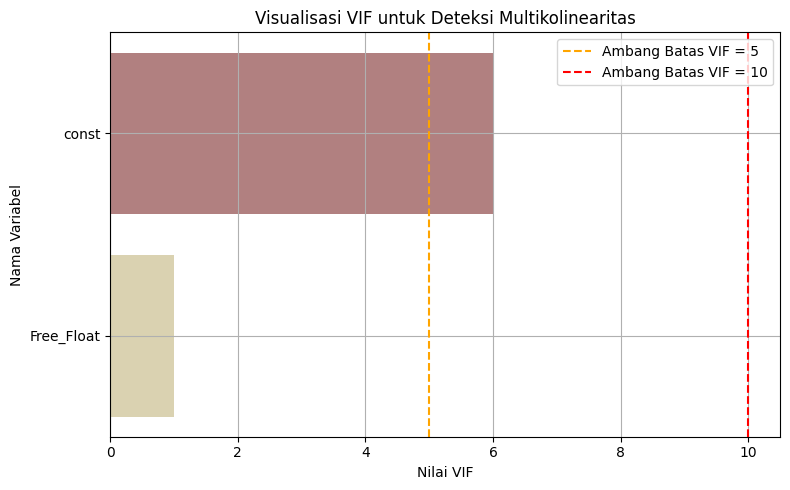

In [36]:
plt.figure(figsize=(8, 5))
sns.barplot(x="VIF", y="Variabel", data=vif_data, palette="pink")
plt.axvline(x=5, color='orange', linestyle='--', label='Ambang Batas VIF = 5')
plt.axvline(x=10, color='red', linestyle='--', label='Ambang Batas VIF = 10')
plt.title("Visualisasi VIF untuk Deteksi Multikolinearitas")
plt.xlabel("Nilai VIF")
plt.ylabel("Nama Variabel")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Hipotesis:
H0 (Hipotesis Nol): Tidak terdapat multikolinearitas pada variabel independen (VIF ≤ 5).

H1 (Hipotesis Alternatif): Terdapat multikolinearitas pada variabel independen (VIF > 5).

Pada hasil uji multikolinearitas, diperoleh nilai VIF:

const (Intercept): VIF = 5.99704

Free_Float: VIF = 1.00000

Berdasarkan hasil ini, dapat disimpulkan bahwa:

*   Variabel Free_Float memiliki VIF sebesar 1, yang jauh di bawah ambang batas 5, sehingga tidak terdapat multikolinearitas pada variabel tersebut.

*   Variabel const (intercept) memiliki VIF sekitar 5.99704, yang berada sedikit di atas ambang batas 5 namun masih jauh dari 10, sehingga tidak terlalu mengkhawatirkan dan masih dapat diterima.

Grafik VIF menunjukkan:

Ambang batas VIF = 5 (garis putus-putus oranye) dan 10 (garis putus-putus merah). Bar untuk variabel Free_Float berada jauh di sebelah kiri ambang batas 5, yang menguatkan bahwa tidak ada multikolinearitas. Bar untuk variabel const mendekati ambang batas 5, namun belum mencapai ambang batas 10, sehingga secara statistik masih dapat ditoleransi.

Berdasarkan hasil uji dan visualisasi, dapat disimpulkan bahwa model regresi tidak mengalami masalah multikolinearitas yang serius. Variabel Free_Float tidak menunjukkan indikasi multikolinearitas sama sekali, sementara variabel const memiliki VIF yang sedikit tinggi tetapi masih dalam batas yang dapat diterima.


# Uji Autokorelasi

In [37]:
from statsmodels.stats.stattools import durbin_watson

In [38]:
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_stat:.4f}")

Durbin-Watson Statistic: 1.9055


In [39]:
if dw_stat < 1.5:
    print(">> Ada indikasi autokorelasi positif.")
elif dw_stat > 2.5:
    print(">> Ada indikasi autokorelasi negatif.")
else:
    print(">> Tidak ada indikasi autokorelasi.")

>> Tidak ada indikasi autokorelasi.


**Visualisasi dengan garis indikator**

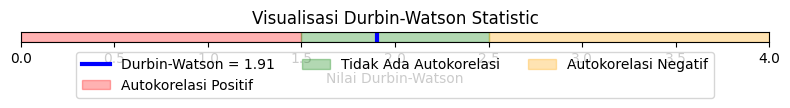

In [42]:
plt.figure(figsize=(8, 1.5))
plt.axvline(x=dw_stat, color='blue', linewidth=3, label=f'Durbin-Watson = {dw_stat:.2f}')
plt.axvspan(0, 1.5, color='red', alpha=0.3, label='Autokorelasi Positif')
plt.axvspan(1.5, 2.5, color='green', alpha=0.3, label='Tidak Ada Autokorelasi')
plt.axvspan(2.5, 4, color='orange', alpha=0.3, label='Autokorelasi Negatif')
plt.xlim(0, 4)
plt.title("Visualisasi Durbin-Watson Statistic")
plt.xlabel("Nilai Durbin-Watson")
plt.yticks([])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.tight_layout()
plt.show()

Hipotesis:
H0 (Hipotesis Nol): Tidak ada autokorelasi pada residual (ρ = 0).

H1 (Hipotesis Alternatif): Ada autokorelasi pada residual (ρ ≠ 0).

Statistik Uji:
Uji Durbin-Watson menghasilkan nilai statistik sekitar 1.9055. Karena nilai ini berada pada rentang 1.5 hingga 2.5, kita menerima H0, yang berarti tidak ada autokorelasi.

Berdasarkan hasil uji Durbin-Watson yang ditunjukkan pada gambar kedua, nilai statistik Durbin-Watson yang diperoleh adalah sekitar 1.9055. Nilai ini berada pada rentang 1.5 hingga 2.5, yang mengindikasikan bahwa tidak ada autokorelasi dalam data residual. Dengan kata lain, residual dari model regresi tidak menunjukkan adanya pola korelasi antar observasi, sehingga model dianggap bebas dari masalah autokorelasi.

Visualisasi pada gambar pertama mendukung interpretasi ini. Pada grafik tersebut, terdapat garis vertikal berwarna biru pada nilai 1.91 (mewakili nilai Durbin-Watson), yang berada di dalam area hijau. Area hijau tersebut menunjukkan rentang nilai Durbin-Watson antara 1.5 dan 2.5, yang berarti tidak ada autokorelasi. Di sisi kiri, area merah menandakan autokorelasi positif (0 hingga 1.5), sedangkan di sisi kanan, area oranye menandakan autokorelasi negatif (2.5 hingga 4).

Dari kedua hasil ini, baik secara visual maupun uji statistik, dapat disimpulkan bahwa model regresi yang digunakan tidak memiliki masalah autokorelasi, sehingga asumsi independensi residual dalam regresi linear telah terpenuhi.